In [1]:
%matplotlib inline

In [2]:
import numpy as np
import xarray as xr
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

import plotly.plotly as py
import plotly.graph_objs as go

import gc

In [3]:
# Load the data
nc = xr.open_dataset('data/G10010_SIBT1850_v1.1.nc')

print(nc)

<xarray.Dataset>
Dimensions:        (latitude: 240, longitude: 1440, time: 1968)
Coordinates:
  * latitude       (latitude) float32 89.875 89.625 89.375 89.125 88.875 ...
  * longitude      (longitude) float32 0.125 0.375 0.625 0.875 1.125 1.375 ...
  * time           (time) datetime64[ns] 1850-01-15 1850-02-15 1850-03-15 ...
Data variables:
    seaice_conc    (time, latitude, longitude) float32 99.2614 99.2614 ...
    seaice_source  (time, latitude, longitude) float32 21.0 21.0 21.0 21.0 ...
Attributes:
    CDI:                       Climate Data Interface version 1.6.2 (http://c...
    Conventions:               CF-1.4
    nco_openmp_thread_number:  1
    CDO:                       Climate Data Operators version 1.6.2 (http://c...
    NCO:                       4.4.2
    version:                   1.0
    release_date:              December_30,_2015
    history:                   Updated G10010_SIBT1850.nc; Enforced consisten...
    filename:                  G10010_SIBT1850_v1.01i


In [4]:
# See what dates we have
nc.time

<xarray.DataArray 'time' (time: 1968)>
array(['1850-01-15T00:00:00.000000000', '1850-02-15T00:00:00.000000000',
       '1850-03-15T00:00:00.000000000', ..., '2013-10-15T00:00:00.000000000',
       '2013-11-15T00:00:00.000000000', '2013-12-15T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1850-01-15 1850-02-15 1850-03-15 ...
Attributes:
    standard_name:  time

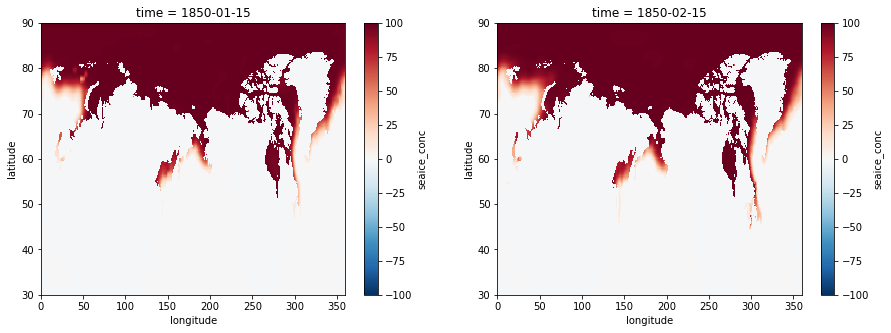

In [5]:
# Take a look at seaice_conc by plotting
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
nc.seaice_conc[0].plot(ax=ax1)
nc.seaice_conc[1].plot(ax=ax2)

In [6]:
# Save seaice_conc to netcdf for saving computational resources
nc.seaice_conc.to_netcdf(path='data/seaice_conc.nc')
nc.close()
del nc

In [7]:
# Load seaice_conc
ds = xr.open_dataset('data/seaice_conc.nc', chunks={'time': 12})

In [8]:
yr_avg = ds.groupby('time.year').mean()
yr_df = yr_avg.seaice_conc.to_dataframe()
yr_df = yr_df.reset_index()

In [9]:
yr_df.head()

,year,seaice_conc
0,1850,24.777754
1,1851,25.098700
2,1852,25.388712
3,1853,25.163200
4,1854,24.848829


In [10]:
yr = go.Scatter(
    x = yr_df.year,
    y = yr_df['seaice_conc'],
    name = 'Yearly Seaice Conc',
    opacity = 0.8)

data = [yr]

layout = dict(
    title='Yearly Seaice Averages',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=5,
                     label='5yr',
                     step='year',
                     stepmode='backward'),
                dict(count=10,
                     label='10yr',
                     step='year',
                     stepmode='backward'),
                dict(count=25,
                     label='25yr',
                     step='year',
                     stepmode='backward'),
                dict(count=50,
                     label='50yr',
                     step='year',
                     stepmode='backward'),
                dict(count=100,
                     label='100yr',
                     step='year',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(),
        type='date'
    )
)

In [11]:
fig = dict(data=data, layout=layout)
py.iplot(fig, filename = "Yearly Seaice Averages")

In [12]:
yr_avg.close()
del yr_df, yr_avg

In [13]:
seasons = ds.groupby('time.season').mean('latitude').mean('longitude')
se_df = seasons.to_dataframe()

seasons.close()
del seasons

se_df.head()
se_df = se_df.groupby([lambda x: x.year, 'season']).mean()
se_df = se_df.reset_index()

In [14]:
se_df.head(n=12)

,level_0,season,seaice_conc
0,1850,DJF,27.071581
1,1850,JJA,22.740520
2,1850,MAM,27.802505
3,1850,SON,21.496418
4,1851,DJF,27.708517
5,1851,JJA,23.405031
6,1851,MAM,27.766159
7,1851,SON,21.515066
8,1852,DJF,27.508780
9,1852,JJA,23.959085


In [15]:
se_df.rename(columns={'level_0': 'year'}, inplace=True)
se_df.head(n=12)

,year,season,seaice_conc
0,1850,DJF,27.071581
1,1850,JJA,22.740520
2,1850,MAM,27.802505
3,1850,SON,21.496418
4,1851,DJF,27.708517
5,1851,JJA,23.405031
6,1851,MAM,27.766159
7,1851,SON,21.515066
8,1852,DJF,27.508780
9,1852,JJA,23.959085


In [16]:
djf_df = se_df.loc[se_df['season'] == 'DJF']
jja_df = se_df.loc[se_df['season'] == 'JJA']
mam_df = se_df.loc[se_df['season'] == 'MAM']
son_df = se_df.loc[se_df['season'] == 'SON']

del se_df

In [17]:
djf_df.head()

,year,season,seaice_conc
0,1850,DJF,27.071581
4,1851,DJF,27.708517
8,1852,DJF,27.508780
12,1853,DJF,27.586918
16,1854,DJF,27.599115


In [18]:
djf = go.Scatter(
    x = djf_df.year,
    y = djf_df['seaice_conc'],
    name = 'DJF Seaice Conc',
    opacity = 0.8)

jja = go.Scatter(
    x = jja_df.year,
    y = jja_df['seaice_conc'],
    name = 'JJA Seaice Conc',
    opacity = 0.8)

mam = go.Scatter(
    x = mam_df.year,
    y = mam_df['seaice_conc'],
    name = 'MAM Seaice Conc',
    opacity = 0.8)

son = go.Scatter(
    x = son_df.year,
    y = son_df['seaice_conc'],
    name = 'SON Seaice Conc',
    opacity = 0.8)

data = [djf, jja, mam, son]

layout = dict(
    title='Yearly Seasonal Seaice Averages',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=5,
                     label='5yr',
                     step='year',
                     stepmode='backward'),
                dict(count=10,
                     label='10yr',
                     step='year',
                     stepmode='backward'),
                dict(count=25,
                     label='25yr',
                     step='year',
                     stepmode='backward'),
                dict(count=50,
                     label='50yr',
                     step='year',
                     stepmode='backward'),
                dict(count=100,
                     label='100yr',
                     step='year',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(),
        type='date'
    )
)

In [19]:
fig = dict(data=data, layout=layout)
py.iplot(fig, filename = "Seasonal Seaice Averages")

In [20]:
del djf, jja, mam, son, data, djf_df, jja_df, mam_df, son_df

In [21]:
lat = ds.latitude.values
lon = ds.longitude.values
conc = ds.seaice_conc.values

In [22]:
def plot_contour_arctic(conc, lon, lat, idx, title=None, save_path=None):
    fig = plt.figure(figsize=(10, 10))
    
    levels = np.arange(0, 100, 10)

    lat_min = 30.0
    lat_max = 80.0
    lon_min = -180
    lon_max = 180

    m = Basemap(width=10.e6, height=11e6,
                projection='gnom', lat_0=88.0, lon_0=-30.0)

    x, y = m(*np.meshgrid(lon[:], lat[:]))
    m.drawcoastlines(color='black')
    m.fillcontinents(color='gray')

    m.drawmeridians(np.arange(np.min(lon), np.max(lon), 20),labels=[0,0,0,1])
    m.drawparallels(np.arange(lat_min, lat_max,10),labels=[1,0,0,0])

    CS1 = m.contourf(x,y,conc[idx,:,:],
                     levels,cmap=plt.get_cmap('RdYlBu_r',len(levels)-1),
                     extend='max')
    CS1.axis='tight'
    plt.colorbar(CS1,orientation='vertical',extend='max', shrink=0.5)

/home/hflores/anaconda3/envs/arcticsea/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning:

The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.

/home/hflores/anaconda3/envs/arcticsea/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning:

The ishold function was deprecated in version 2.0.

/home/hflores/anaconda3/envs/arcticsea/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning:

axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.



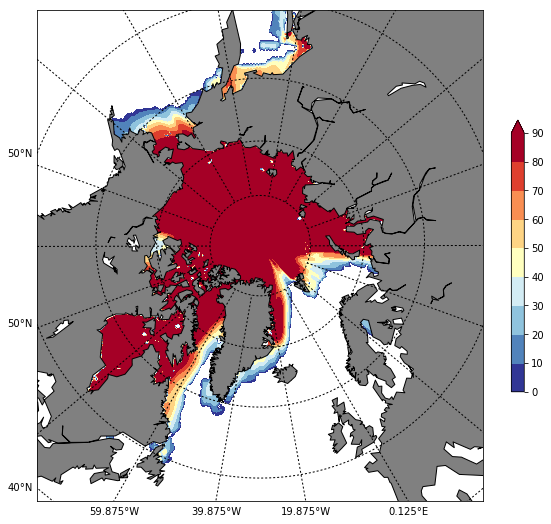

In [23]:
plot_contour_arctic(conc, lon, lat, 1000)
del lat, lon, conc

In [24]:
years_ds = [group for label, group in list(ds.groupby('time.year'))]
seasons_ds = [y.groupby('time.season').mean('time') for y in years_ds]
frames = [s.seaice_conc.to_dataframe().reset_index() for s in seasons_ds]
for y, f in enumerate(frames):
    f.insert(0, 'year', 1850+y)

Xdf = pd.concat(frames)
Xdf.head()

,year,season,latitude,longitude,seaice_conc
0,1850,DJF,89.875,0.125,99.492889
1,1850,DJF,89.875,0.375,99.492882
2,1850,DJF,89.875,0.625,99.492867
3,1850,DJF,89.875,0.875,99.492859
4,1850,DJF,89.875,1.125,99.492859


In [25]:
Xdf.rename(columns={'latitude': 'lat', 'longitude': 'lon', 'seaice_conc': 'conc'}, inplace=True)

In [26]:
# Try to free up resources before saving Xdf results as csv
for d in seasons_ds:
    d.close()
    del d
for d in years_ds:
    d.close()
    del d
ds.close()

for f in frames:
    del f

del frames, seasons_ds, years_ds, ds
gc.collect()
gc.collect()
%reset out

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Flushing output cache (9 entries)


In [27]:
# Save Xdf as csv
Xdf.to_csv('data/yearly_seasonal_conc.csv', index=False)


In [28]:
#del Xdf
#gc.collect()
#gc.collect()
#% reset out

In [ ]:
## Partition dataset by season
#df = pd.read_csv('data/yearly_seasonal_conc.csv')
#
#djf = df.loc[df['season'] == 'DJF']
#mam = df.loc[df['season'] == 'MAM']
#jja = df.loc[df['season'] == 'JJA']
#son = df.loc[df['season'] == 'SON']
#
## Free up
#import gc
#del df
#gc.collect()
#gc.collect()
#%reset out
#
## Write 
#djf.to_csv('data/djf_conc.csv', index=False)
#mam.to_csv('data/mam_conc.csv', index=False)
#jja.to_csv('data/jja_conc.csv', index=False)
#son.to_csv('data/son_conc.csv', index=False)